In [46]:
import matplotlib.pyplot as plt
from PIL import Image

In [47]:
img = Image.open('data/alpacas.jpg')
rotated_image = img.rotate(180)
img = rotated_image
pixel_values = img.load()

In [48]:
def remap(value, low1, high1, low2, high2):
    
    return low2 + (value - low1) * (high2 - low2) / (high1 - low1)

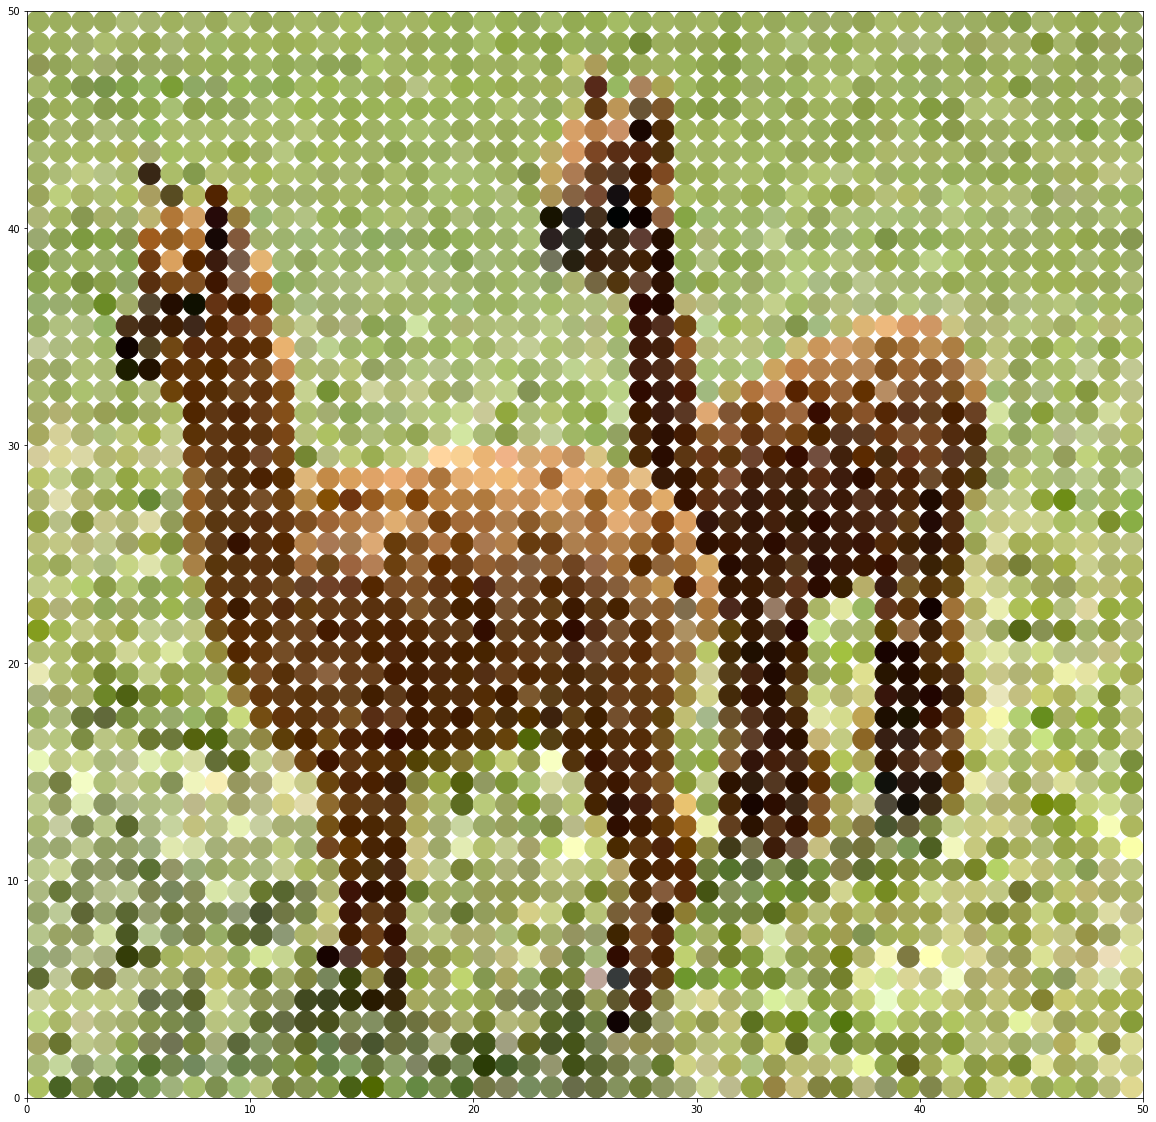

In [49]:
#set size of figure
plt.figure(figsize=(20,20))

width = 50
height = 50

#set limits of axis
plt.xlim(0, 50)
plt.ylim(0, 50)

numx = 50
numy = 50

dx = float(width)/numx
dy = float(height)/numy

for y in range(numy):
    for x in range(numx):
        px = x*dx+dx/2
        py = y*dy+dy/2
        
        c = remap(px, 0, width, 0, img.width)
        r = remap(py, 0, height, 0, img.height)
        col = pixel_values[int(c),int(r)]
        
        my_color = [col[0]/255, col[1]/255, col[2]/255]
        cir = plt.Circle((px, py), dx/2, color = my_color)
        
        plt.gcf().gca().add_artist(cir)



<Figure size 432x288 with 0 Axes>

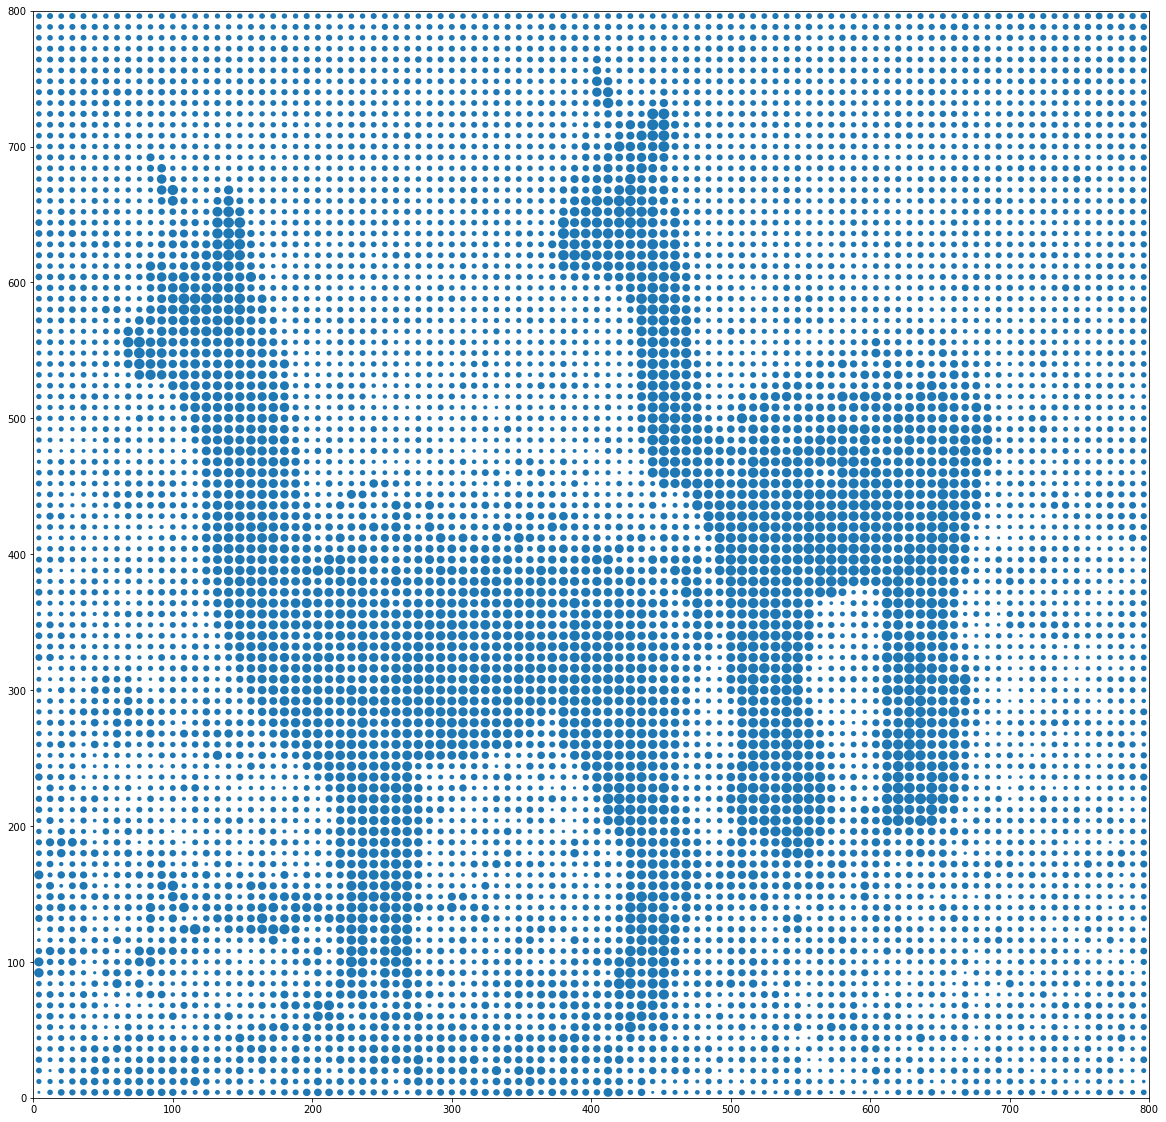

In [58]:
#Clear the current figure
plt.clf()

plt.figure(figsize=(20,20))

width = 800
height = 800

#set limits of axis
plt.xlim(0, 800)
plt.ylim(0, 800)

numx = 100
numy = 100

dx = float(width)/numx
dy = float(height)/numy

for y in range(numy):
    for x in range(numx):
        
        px = x*dx+dx/2
        py = y*dy+dy/2
        
        c = remap(px, 0, width, 0, img.width)
        r = remap(py, 0, height, 0, img.height)
        col = pixel_values[int(c),int(r)]
        
        #turn to grayscale
        #0.2989 * R + 0.5870 * G + 0.1140 * B 
        rad = 0.3*col[0] + 0.59*col[1] + 0.11*col[2]
        rad = rad/255

        radius = remap(rad, 0, 1, dx/2, 1)
        
        cir = plt.Circle((px, py), radius)
        
        plt.gcf().gca().add_artist(cir)

<Figure size 432x288 with 0 Axes>

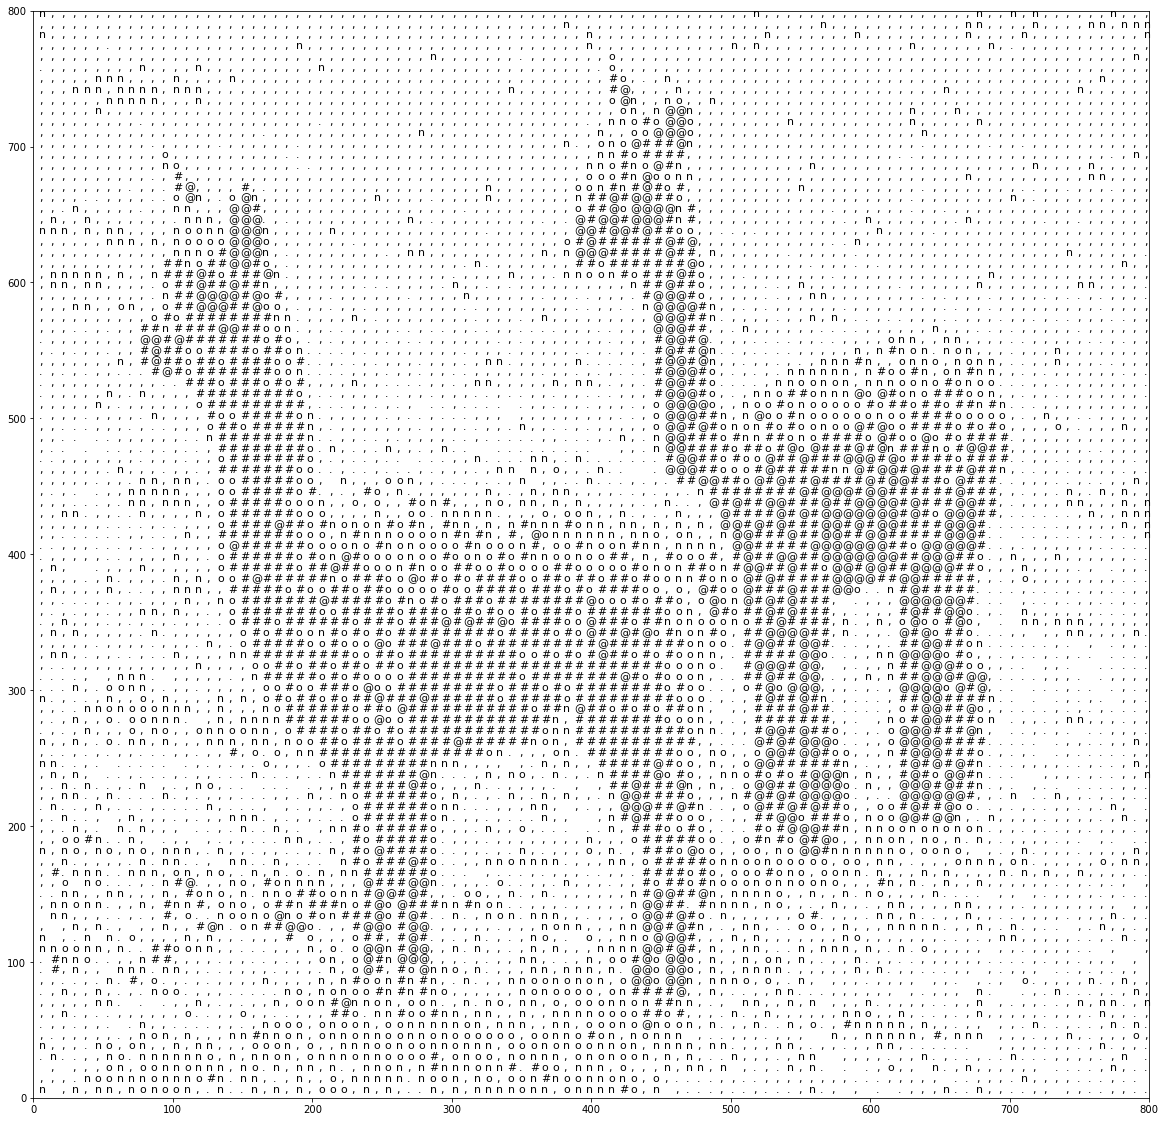

In [60]:
plt.clf()
plt.figure(figsize=(20,20))

width = 800
height = 800

#set limits of axis
plt.xlim(0, 800)
plt.ylim(0, 800)

numx = 100
numy = 100

dx = float(width)/numx
dy = float(height)/numy


charlist = [' ','.',',','n','o','#','@']

for y in range(numy):
    for x in range(numx):
        
        c = remap(px, 0, width, 0, img.width)
        r = remap(py, 0, height, 0, img.height)
        col = pixel_values[int(c),int(r)]
        
        val = 0.3*col[0] + 0.59*col[1] + 0.11*col[2]
        val = val/255
        val = 1-val
        idx = int(val*(len(charlist)))
        c = charlist[idx]
        
        px = x*dx+dx/2
        py = y*dy+dy/2
        
        plt.text( px, py, c, fontsize= int(dx) + 3 )

plt.show()